In [20]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr

In [21]:
import h5py

In [22]:
filename = '../data/reef_mask/compiled_5km_reef_mask_for_edit_20171113_buffer4pix.h5'

In [23]:
f = h5py.File(filename, 'r')

In [24]:
list(f.keys())

['landmask', 'lat', 'lon', 'mask']

In [25]:
lat = np.array(f['lat'])

In [26]:
lon = np.array(f['lon'])

In [27]:
land_mask = np.array(f['landmask'])

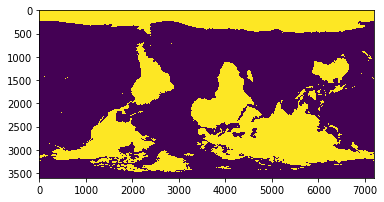

In [28]:
plt.imshow(land_mask)

In [29]:
reef_mask = np.array(f['mask'])

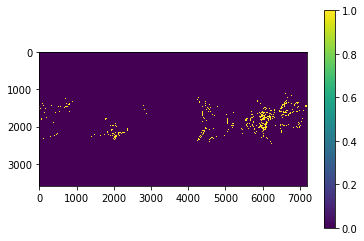

In [30]:
plt.imshow(reef_mask); plt.colorbar()

### flips the latitudes so they go FROM North TO South as in the BAA 7d max dataset 

In [31]:
reef_mask = reef_mask[::-1,:]

In [32]:
land_mask = land_mask[::-1,:]

In [33]:
lat = lat[::-1]

### creates a xarray dataset from a dictionnary 

In [34]:
d = {}

In [36]:
d['lat'] = (('lat',), lat)
d['lon'] = (('lon',), lon)
d['reef_mask'] = (('lat','lon'), reef_mask)
d['land_mask'] = (('lat','lon'), land_mask)

In [37]:
dset = xr.Dataset(d)

In [38]:
dset

<xarray.Dataset>
Dimensions:    (lat: 3600, lon: 7200)
Coordinates:
  * lon        (lon) float32 -179.975 -179.925 -179.875 -179.825 -179.775 ...
  * lat        (lat) float32 89.975 89.925 89.875 89.825 89.775 89.725 ...
Data variables:
    reef_mask  (lat, lon) uint8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    land_mask  (lat, lon) uint8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...

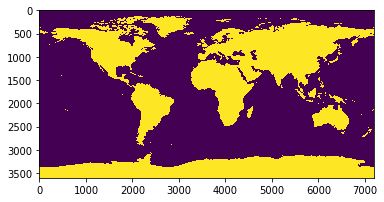

In [39]:
plt.imshow(dset['land_mask'].data)

### saves to netcdf 

In [126]:
dset.to_netcdf('../data/reef_mask/compiled_5km_reef_mask_for_edit_20171113_buffer4pix.nc')

### closes all open files 

In [40]:
dset.close()

In [41]:
f.close()